<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/XGBOOST_ML/blob/main/xgboost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset [BANK MARKETING DATASET]

- Dataset Characteristics: Multivariate

- Subject Area: Business

- Associated Tasks: Classification

- Feature Type: Categorical, Integer

- Instances:45211 and Features: 16

Dataset Information
Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
## importing th libraies:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# calling csv as data:
path = "/content/bank.csv"
data  = pd.read_csv(path)
data.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5681,28,blue-collar,single,secondary,no,97,yes,no,unknown,7,may,67,1,-1,0,unknown,no
6256,29,admin.,single,tertiary,no,8,no,yes,cellular,2,mar,107,1,-1,0,unknown,no
10375,43,services,married,secondary,no,192,yes,yes,unknown,30,may,273,2,-1,0,unknown,no


In [3]:
### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


data_shape
: (11162, 17)

duplicated values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campai

In [4]:
## converting all yes/no columns with 1/0
yn_columns = ["default","housing","loan","deposit"]

for i in yn_columns:
    data[i] = data[i].replace("no", 0)
    data[i] = data[i].replace("yes", 1)


# Defining a mapping of month names to numerical values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Appling the mapping to the 'Month' column
data['month'] = data['month'].map(month_mapping)


In [5]:
## saving data
data.to_csv('bank_market_dataset.csv', index=False)

In [6]:
data.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1199,66,technician,married,secondary,0,0,0,0,cellular,6,2,751,1,-1,0,unknown,1


In [7]:
data_numerical = []
data_categorical = []

for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        data_numerical.append(i)
    else:
        data_categorical.append(i)

print(f"numerical columns: {data_numerical}")
print(f"categorical columns: {data_categorical}")

numerical columns: ['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit']
categorical columns: ['job', 'marital', 'education', 'contact', 'poutcome']


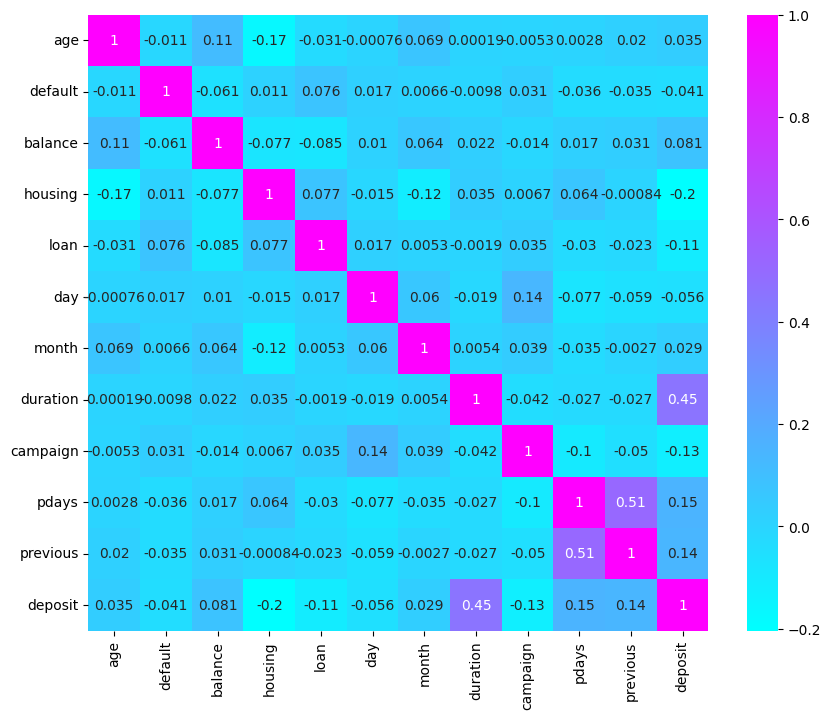

In [8]:
##plotting heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data[data_numerical].corr(), cmap='cool',annot=True);

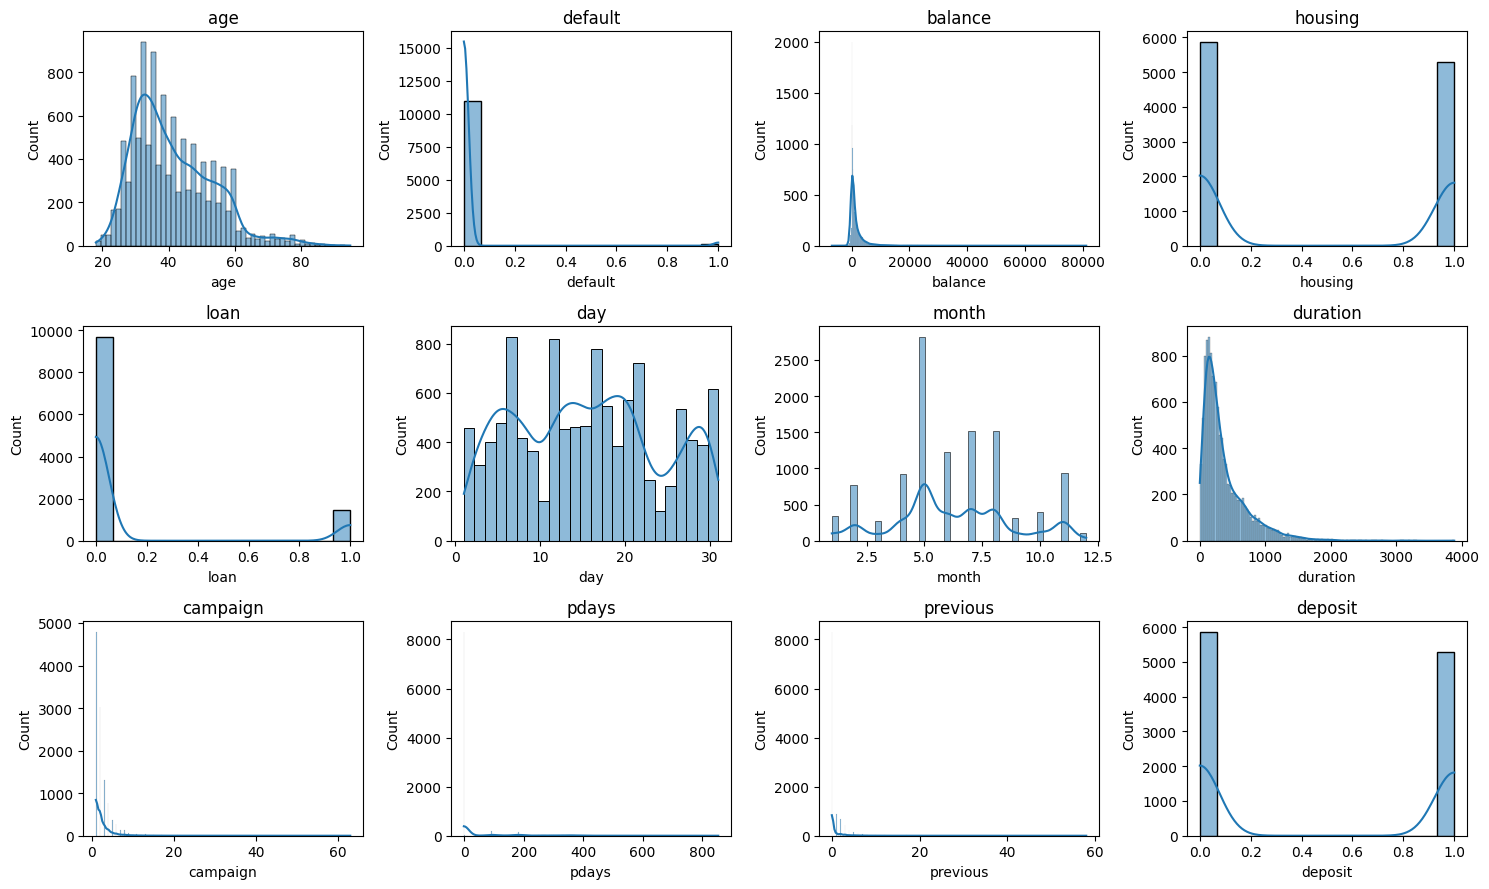

In [9]:
## ploting histplot:

num_rows = 3
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data[data_numerical]):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

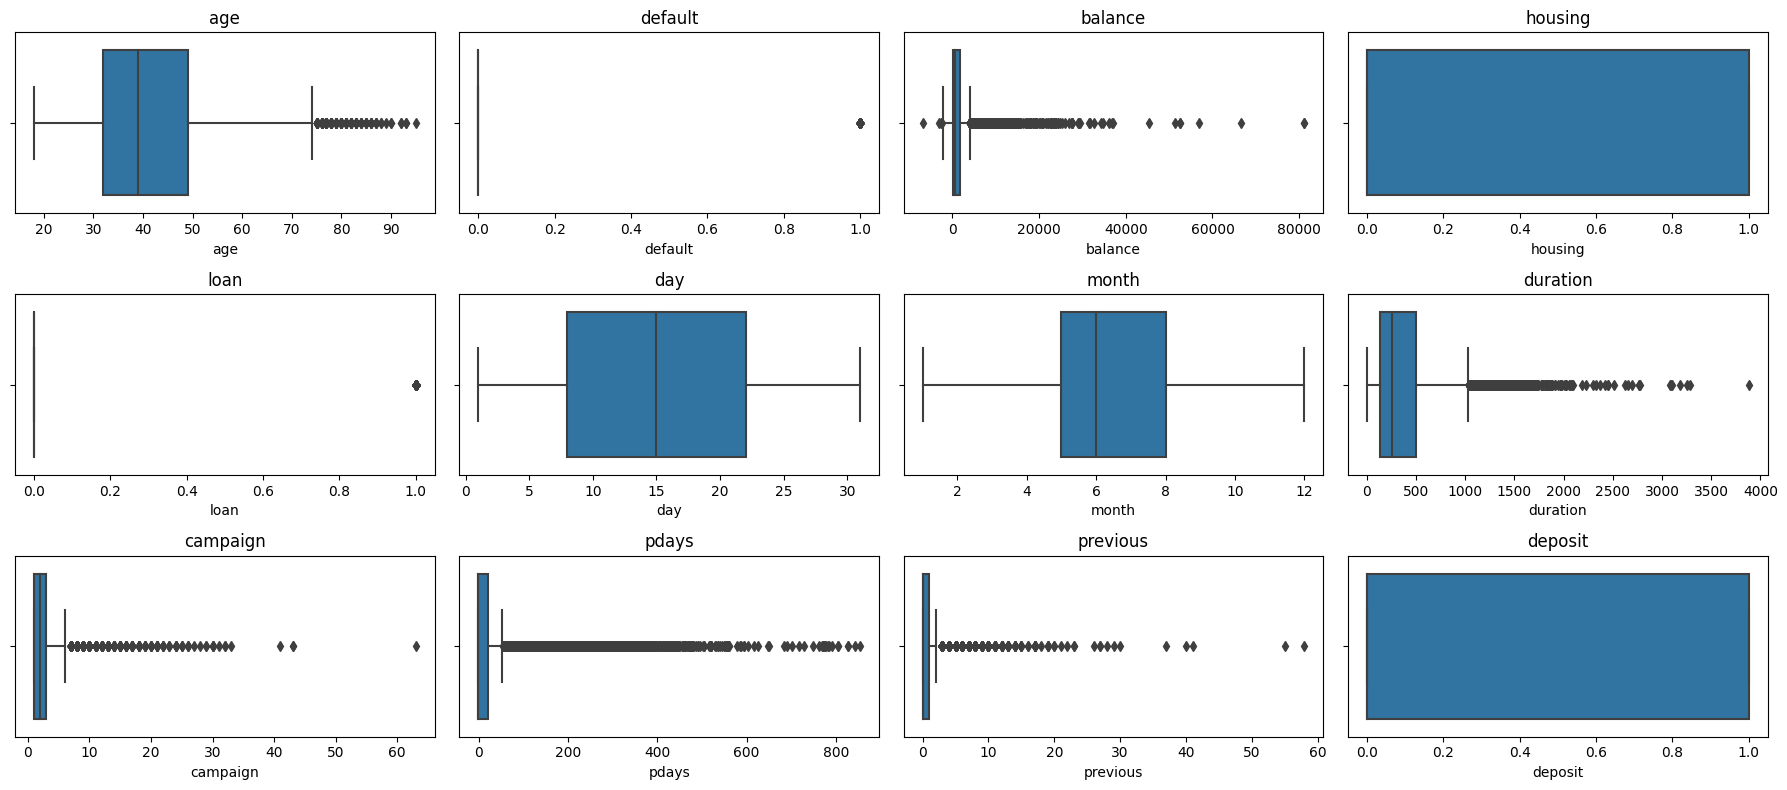

In [10]:
num_rows = 3
num_cols = 4



# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data[data_numerical]):
    sns.boxplot(data=data[data_numerical],x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
default,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.00,1.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.00,1.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
month,11162.0,6.190826,2.572792,1.0,5.0,6.0,8.00,12.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0


In [12]:
## spliting data into features and target values:
x = data.drop(columns = ["deposit"],axis = 1)
y = data["deposit"]
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target dataset:{y.shape}")
print(f"\n frequency of target :\n{y.value_counts()}")

shape of feature dataset:(11162, 16)
shape of target dataset:(11162,)

 frequency of target :
0    5873
1    5289
Name: deposit, dtype: int64


In [13]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
default,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.00,1.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.00,1.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
month,11162.0,6.190826,2.572792,1.0,5.0,6.0,8.00,12.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0


In [14]:
## converting categorical into numerical:
from sklearn.preprocessing import OneHotEncoder

x_numerical = []
for i in x.columns:
    if pd.api.types.is_numeric_dtype(x[i]):
        data_numerical.append(i)

OHE = OneHotEncoder()

## data scaled
encoder = OHE.fit_transform(x[data_categorical])

## fitting encode into frame with columns:
encoder_frame = pd.DataFrame(encoder.toarray(), columns = OHE.get_feature_names_out(data_categorical))

# Reset the index of encode_categories and data_num_frame
encode_frame = encoder_frame.reset_index(drop=True)
data_numerical_frame = x[x_numerical].reset_index(drop=True)



x_encode = pd.concat([encoder_frame, data_numerical_frame],axis = 1)
print(f"x_encode shape: {x_encode.shape}")
x_encode.sample()

x_encode shape: (11162, 26)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
7222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
## import from sklearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## train test split:
x_train, x_test, y_train, y_test = train_test_split(x_encode,y, test_size = 0.2, random_state = 42)

## taking equal number of sample from x_train and y_train:
smote = SMOTE()
x_train_res, y_train_res  = smote.fit_resample(x_train,y_train)

## checking shape and dimention:
print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))


## checking shape of resampled data:
print("shape of x_train_res{} and have dimension: {}".format(x_train_res.shape, x_train_res.ndim))
print("shape of y_test_res{} and have dimension: {}".format(y_train_res.shape, y_train_res.ndim))

## checking frequency of resampled data:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


shape of x_train(8929, 26) and have dimension: 2
shape of y_train(8929,) and have dimension: 1
shape of x_test(2233, 26)  and have dimension: 2
shape of y_test(2233,) and have dimension: 2
shape of x_train_res(9414, 26) and have dimension: 2
shape of y_test_res(9414,) and have dimension: 1
After OverSampling, counts of label '1': 4707
After OverSampling, counts of label '0': 4707


In [16]:
Parameters = {
              'n_estimators': [40,50,60,70,80,90,100],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [5,10,15,20],
              'min_samples_split' : [2,4,6,8,10],
              'max_features' : ['sqrt', 'log2', None],
            }


RFC = RandomForestClassifier()

RSCV = RandomizedSearchCV(RFC, Parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose = 3)
RSCV.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100]},
                   scoring='accuracy', verbose=3)

In [17]:
# Get the best parameters and best score
best_params = RSCV.best_params_
best_score = RSCV.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'n_estimators': 40, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
Best Score: 0.641916294879966


In [18]:
## selecting best feature using random forest
from sklearn.feature_selection import SelectFromModel

Best_Parameters = {
                    'n_estimators': 40,
                    'min_samples_split': 10,
                    'max_features': 'log2',
                    'max_depth': 10,
                    'criterion': 'entropy'}

RFC = RandomForestClassifier(**Best_Parameters)
RFC_model = RFC.fit(x_train_res, y_train_res)

# Print the feature importances
x_train_col_names = []
for i in x_train.columns:
    x_train_col_names.append(i)

print("Feature Importances")
for i, importance in enumerate(RFC_model.feature_importances_):
    print(f"Feature {x_train_col_names[i]}: {importance}")


# best feature
SFM  = SelectFromModel(RFC_model, threshold=0.01)
best_feature_fit = SFM.fit(x_train_res, y_train_res)


# Transform the training and testing data
x_train_selected = best_feature_fit.transform(x_train_res)
x_test_selected = best_feature_fit.transform(x_test)



Feature Importances
Feature job_admin.: 0.006377393828131538
Feature job_blue-collar: 0.017914492360571372
Feature job_entrepreneur: 0.006122040101802892
Feature job_housemaid: 0.009668304369051237
Feature job_management: 0.010454848707267055
Feature job_retired: 0.03592517172743907
Feature job_self-employed: 0.00797321453226655
Feature job_services: 0.009464249085082003
Feature job_student: 0.02513689224182818
Feature job_technician: 0.009253446773440512
Feature job_unemployed: 0.007635813367033289
Feature job_unknown: 0.004308265025808212
Feature marital_divorced: 0.014288097313480672
Feature marital_married: 0.02753960314074134
Feature marital_single: 0.028820028579534883
Feature education_primary: 0.016604159139718695
Feature education_secondary: 0.018426256524972075
Feature education_tertiary: 0.025351187145172233
Feature education_unknown: 0.010635285352747978
Feature contact_cellular: 0.10417609037023393
Feature contact_telephone: 0.019120044101211174
Feature contact_unknown: 0.

In [19]:
## searching for XGB parameter booster tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

XGB_PARAMETER = {'learning_rate':[0.01,0.05,0.001,0.1],
                 'max_depth':[2,4,6,8,10],
                 'min_child_weight':[2,4,6,8,10],
                 'gamma': [5,6,7,8,9,10] }


XGB = XGBClassifier()

RSCV = RandomizedSearchCV(XGB, XGB_PARAMETER, cv=3, scoring='accuracy', n_jobs=-1, verbose = 3)
RSCV.fit(x_train_selected, y_train_res)

# Get the best parameters and best score
best_params = RSCV.best_params_
best_score = RSCV.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_child_weight': 4, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 9}
Best Score: 0.6381984278733801


In [20]:

XGB_PARAMETER = {'min_child_weight': 4,
                 'max_depth': 8,
                 'learning_rate': 0.05,
                 'gamma': 6,
                 'booster': 'gbtree'
                 }



XGB = XGBClassifier(**XGB_PARAMETER)
XGB_model = XGB.fit(x_train_selected, y_train_res)


In [21]:
y_pred = XGB_model.predict(x_test_selected)

In [22]:
## importing matrics from sklearn:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## printig report:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1166
           1       0.69      0.60      0.64      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.67      0.67      2233
weighted avg       0.68      0.68      0.68      2233



In [23]:
## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")


f1_score : 0.64
accuracy_score: 0.68


[[878 288]
 [431 636]]


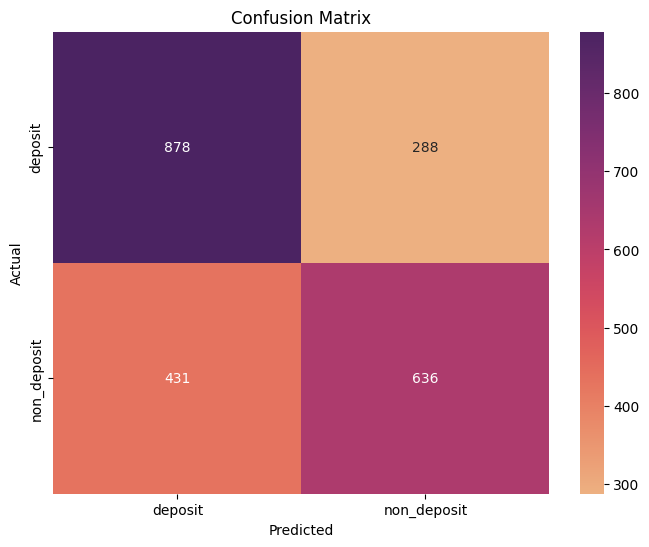

In [24]:
 #Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=['deposit', 'non_deposit'], yticklabels=['deposit', 'non_deposit'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

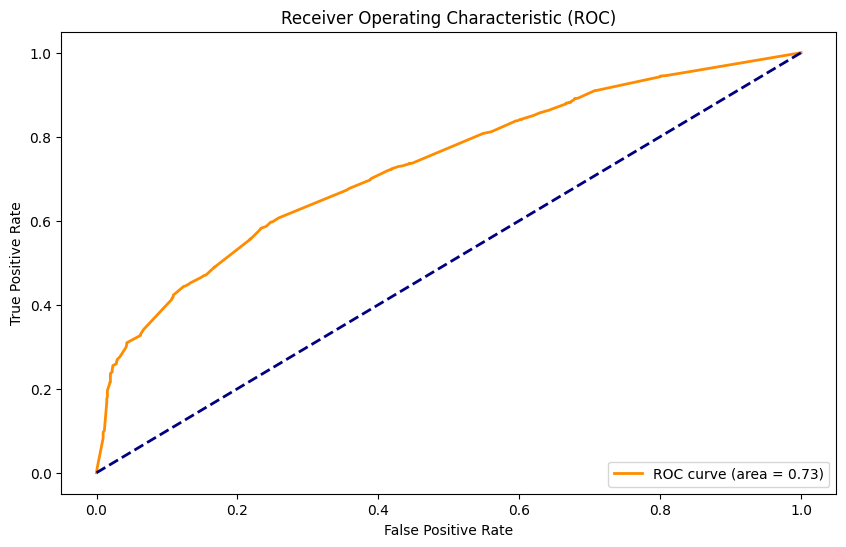

In [25]:
#prdicted probabilities for class 1 (assuming it's a binary classification problem)
y_prob = XGB_model.predict_proba(x_test_selected)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


---
---